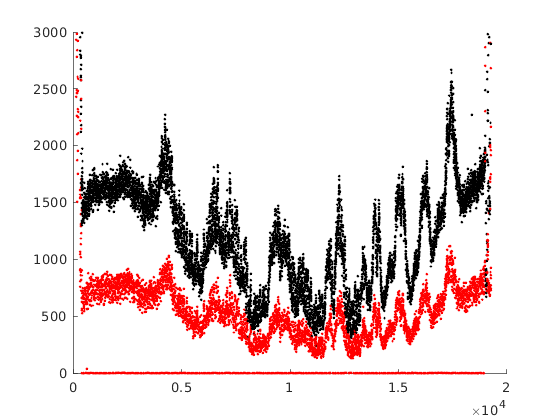

In [63]:
% read data
d = readtable('cast_xb_datfile.txt', 'HeaderLines', 0);

% get series of abundances
s = d.('Var15');

% detect outliers
k = 8;      % size of one side of the moving window
tau = 0.75; % quantile to consider as correct values
mult = 0.6; % multiplier of the quantile under which points are considered outliers

% pad the series with half a window on each side
ss = [nan(k,1); s; nan(k,1)];
% prepare storage for the quantile
n = size(s,1);
q = nan(n,1);
% compute the quantile in a moving window
for i=1:n
    q(i) = quantile(ss(i:(i+2*k)), tau);
end

% apply the criterion to detect outliers
outlier = s < mult * q;

% plot the result
cols = [0 0 0; 1 0 0];
scatter(1:n, s, 0.5, cols(outlier+1,:))
ylim([0 3000])